<a href="https://colab.research.google.com/github/diego-andrade279/Aula-de-deploy-de-modelos-de-machine-learning-usando-streamlit/blob/main/Aula_Regress%C3%A3o_Linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Dicionário de dados **

- mpg - Milhas por galão, variável target
- cyl - Numero de cilindros do motor
- dis - Deslocamento
- hp - Potencia bruta
- drat - Relação do eixo traseiro
- wt - Peso do veiculo
- qsec - Tempo no 1/4 de milha
- vs - Motor (0 = motor em V, 1 Motor em linha)
- am - Tipo de transmissão (0 = automatica, 1 = manual)
- gear - Numero de marchas
- carb - Numero de carburadores

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from pydrive.auth import GoogleAuth 
from pydrive.drive import GoogleDrive 
from google.colab import auth 
from oauth2client.client import GoogleCredentials 
import statsmodels.api as sm

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
auth.authenticate_user() 
gauth = GoogleAuth() 
gauth.credentials = GoogleCredentials.get_application_default() 
drive = GoogleDrive(gauth)

In [ ]:
link = 'https://drive.google.com/file/d/1oFUy7dYR93Qx4gcGlTXZAN4Itei6lSYC/view?usp=sharing'
id = link.split("/")[-2]
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('mtcars.csv')
df = pd.read_csv('mtcars.csv')
df.shape

(32, 12)

In [ ]:
# Altera nomes das colunas
df.columns = ['modelo', 'mpg', 'cilindros', 'deslocamento', 'cavalos', 'relacao', 'peso', 'tempo_1.4_milha', 'motor_em_v', 
              'transmissao_automatica', 'marchas', 'carburadores']

##### Análise Exploratória

In [ ]:
# Analises iniciais dos dados 
df.describe()

,mpg,cilindros,deslocamento,cavalos,relacao,peso,tempo_1.4_milha,motor_em_v,transmissao_automatica,marchas,carburadores
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


In [ ]:
# Analise de correlação
df.corr()

,mpg,cilindros,deslocamento,cavalos,relacao,peso,tempo_1.4_milha,motor_em_v,transmissao_automatica,marchas,carburadores
mpg,1.000000,-0.852162,-0.847551,-0.776168,0.681172,-0.867659,0.418684,0.664039,0.599832,0.480285,-0.550925
cilindros,-0.852162,1.000000,0.902033,0.832447,-0.699938,0.782496,-0.591242,-0.810812,-0.522607,-0.492687,0.526988
deslocamento,-0.847551,0.902033,1.000000,0.790949,-0.710214,0.887980,-0.433698,-0.710416,-0.591227,-0.555569,0.394977
cavalos,-0.776168,0.832447,0.790949,1.000000,-0.448759,0.658748,-0.708223,-0.723097,-0.243204,-0.125704,0.749812
relacao,0.681172,-0.699938,-0.710214,-0.448759,1.000000,-0.712441,0.091205,0.440278,0.712711,0.699610,-0.090790
peso,-0.867659,0.782496,0.887980,0.658748,-0.712441,1.000000,-0.174716,-0.554916,-0.692495,-0.583287,0.427606
tempo_1.4_milha,0.418684,-0.591242,-0.433698,-0.708223,0.091205,-0.174716,1.000000,0.744535,-0.229861,-0.212682,-0.656249
motor_em_v,0.664039,-0.810812,-0.710416,-0.723097,0.440278,-0.554916,0.744535,1.000000,0.168345,0.206023,-0.569607
transmissao_automatica,0.599832,-0.522607,-0.591227,-0.243204,0.712711,-0.692495,-0.229861,0.168345,1.000000,0.794059,0.057534
marchas,0.480285,-0.492687,-0.555569,-0.125704,0.699610,-0.583287,-0.212682,0.206023,0.794059,1.000000,0.274073


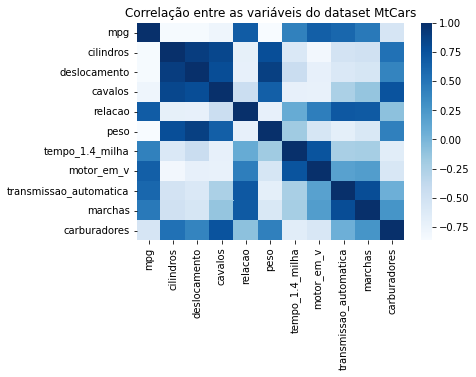

In [ ]:
sns.heatmap(df.corr(), 
            annot=False, 
            fmt='.2f', 
            cmap='Blues')
plt.title('Correlação entre as variáveis do dataset MtCars')
plt.show()

#### Conclusões e Hipoteses

Observamos que o peso tem mais relação com o milhas por galão que a própria cavalaria do veiculo. 

Uma hipotese que eu tinha era a de que motores em V teriam consumo maior, mas pela correlação não demosntra este comportamento. 

Vamos investigar a relaçao entre quantidade de carburadores, cilindros, peso, potencia e deslocamento se relacionam com o consumo apresentado em mpg.

In [ ]:
import seaborn as sns 

In [ ]:
sns.pairplot(df)

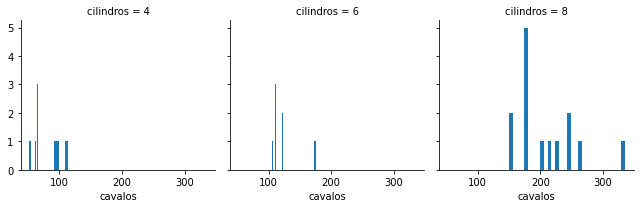

In [ ]:
g = sns.FacetGrid(df, col='cilindros')
g.map(plt.hist, 'cavalos', bins=30)
plt.show()

Observamos que carros com 8 cilindros possuem maior cavalaria de modo de geral, partindo de 150 cavalos até mais de 300 cavalos. 

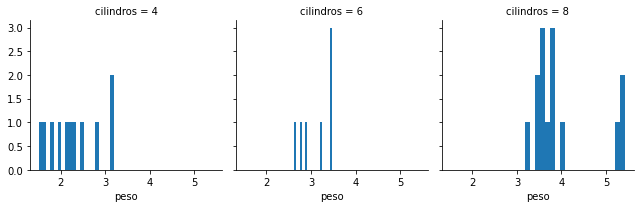

In [ ]:
g = sns.FacetGrid(df, col='cilindros')
g.map(plt.hist, 'peso', bins=20)
plt.show()

Neste gráfico notamos que os carros com 8 cilindros além de maior cavalaria possuem os maiores pesos, chegando a 5.5 toneladas

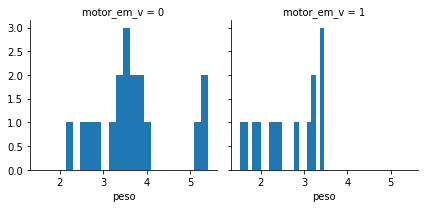

In [ ]:
g = sns.FacetGrid(df, col='motor_em_v')
g.map(plt.hist, 'peso', bins=20)
plt.show()

#### Modelo Preditivo

In [ ]:
X = df['peso']
y = df['mpg']

In [ ]:
simple_linear_model = sm.OLS(y, sm.add_constant(X)).fit()

In [ ]:
print(simple_linear_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     91.38
Date:                Tue, 27 Sep 2022   Prob (F-statistic):           1.29e-10
Time:                        00:05:09   Log-Likelihood:                -80.015
No. Observations:                  32   AIC:                             164.0
Df Residuals:                      30   BIC:                             167.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         37.2851      1.878     19.858      0.0

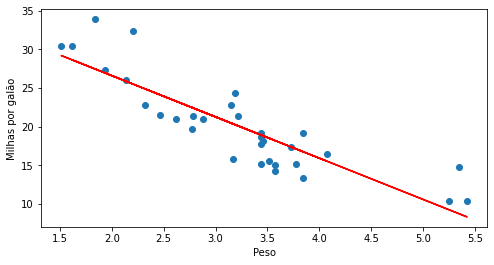

In [ ]:
plt.figure(figsize=(8,4))
plt.scatter(X,y)
plt.plot(X, simple_linear_model.predict(), color='r')
plt.xlabel('Peso')
plt.ylabel('Milhas por galão')
plt.show()

#### Exercício para agora

1. Adicionem mais features no modelo para chegar a um resultado melhor.

In [ ]:
X = df[['peso', 'cilindros', 'cavalos', 'relacao', 'motor_em_v']]
y = df['mpg']

In [ ]:
multiple_linear_model = sm.OLS(y, sm.add_constant(X)).fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
print(multiple_linear_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     28.44
Date:                Tue, 27 Sep 2022   Prob (F-statistic):           9.22e-10
Time:                        00:27:39   Log-Likelihood:                -72.504
No. Observations:                  32   AIC:                             157.0
Df Residuals:                      26   BIC:                             165.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         33.5289      8.778      3.820      0.0

#### Modelo 2

In [ ]:
# Transforma a variável modelo (nome do modelo) em numeros categoricos
df['modelo'] = df['modelo'].astype('category')
df['modelo'] = df['modelo'].cat.codes

In [ ]:
# Segunda abordagem usa todas as variáveis 
X = df.drop('mpg', axis=1)
y = df['mpg']

In [ ]:
multiple_linear_model = sm.OLS(y, sm.add_constant(X)).fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
print(multiple_linear_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     12.13
Date:                Tue, 27 Sep 2022   Prob (F-statistic):           1.42e-06
Time:                        00:32:20   Log-Likelihood:                -69.776
No. Observations:                  32   AIC:                             163.6
Df Residuals:                      20   BIC:                             181.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     12

#### Modelo 3

In [ ]:
df_copy = df.copy

In [ ]:
# Terceira abordagem. Transforma as variáveis peso, deslocamento e cavalos usando log.
import numpy as np
df['peso'] = np.log(df['peso'])
df['deslocamento'] = np.log(df['deslocamento'])
df['cavalos'] = np.log(df['cavalos'])

In [ ]:
# Continuo usando todas as variáveis
X = df.drop('mpg', axis=1)
y = df['mpg']

In [ ]:
multiple_linear_model = sm.OLS(y, sm.add_constant(X)).fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
print(multiple_linear_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     16.90
Date:                Tue, 27 Sep 2022   Prob (F-statistic):           8.68e-08
Time:                        00:37:01   Log-Likelihood:                -65.067
No. Observations:                  32   AIC:                             154.1
Df Residuals:                      20   BIC:                             171.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     37

#### Modelo 4 

In [ ]:
# Aplica log na variável tempo_1.4_milha 
df['tempo_1.4_milha'] = np.log(df['tempo_1.4_milha'])

In [ ]:
# Continuo usando todas as variáveis
X = df[['tempo_1.4_milha', 'cavalos', 'deslocamento', 'peso']]
y = df['mpg']

In [ ]:
multiple_linear_model = sm.OLS(y, sm.add_constant(X)).fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
print(multiple_linear_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     55.67
Date:                Tue, 27 Sep 2022   Prob (F-statistic):           1.19e-12
Time:                        00:45:00   Log-Likelihood:                -66.789
No. Observations:                  32   AIC:                             143.6
Df Residuals:                      27   BIC:                             150.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              40.6455     30.078     

#### Modelo 5

In [ ]:
# Monta variáveis de razão entre peso e outras variáveis 
df['relacao_peso_potencia'] = df['peso']/df['cavalos']
df['relacao_peso_carb'] = df['peso']/df['carburadores']
df['relacao_peso_cilindros'] = df['peso']/df['cilindros']

In [ ]:
# Continuo usando todas as variáveis
X = df[['tempo_1.4_milha', 'cavalos', 'deslocamento', 'peso', 'relacao_peso_potencia', 'relacao_peso_carb', 'relacao_peso_cilindros']]
y = df['mpg']

In [ ]:
df.sample(2)

,modelo,mpg,cilindros,deslocamento,cavalos,relacao,peso,tempo_1.4_milha,motor_em_v,transmissao_automatica,marchas,carburadores,relacao_peso_potencia,relacao_peso_carb,relacao_peso_cilindros
20,29,21.5,4,4.788325,4.574711,3.70,0.902192,2.996232,1,0,3,1,0.197213,0.902192,0.225548
25,9,27.3,4,4.369448,4.189655,4.08,0.660107,2.939162,1,1,4,1,0.157556,0.660107,0.165027


In [ ]:
multiple_linear_model = sm.OLS(y, sm.add_constant(X)).fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
print(multiple_linear_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     28.76
Date:                Tue, 27 Sep 2022   Prob (F-statistic):           3.46e-10
Time:                        00:50:55   Log-Likelihood:                -66.544
No. Observations:                  32   AIC:                             149.1
Df Residuals:                      24   BIC:                             160.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     49

In [ ]:
# Continuo usando todas as variáveis
X = df.drop('mpg', axis=1)
y = df['mpg']

In [ ]:
multiple_linear_model = sm.OLS(y, sm.add_constant(X)).fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
print(multiple_linear_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     11.94
Date:                Tue, 27 Sep 2022   Prob (F-statistic):           3.74e-06
Time:                        00:52:18   Log-Likelihood:                -64.260
No. Observations:                  32   AIC:                             158.5
Df Residuals:                      17   BIC:                             180.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     58